# Staking

C:\Users\klgt1\AppData\Local\Temp\ipykernel_15776\1101341146.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\lo

[LightGBM] [Info] Number of positive: 906, number of negative: 1115
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 2021, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.448293 -> initscore=-0.207570
[LightGBM] [Info] Start training from score -0.207570
[LightGBM] [Info] Number of positive: 724, number of negative: 892
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 554
[LightGBM] [Info] Number of data points in the train set: 1616, number of used features: 32
[LightGBM] [Info] [binary:Boo

C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(
C:\Users\klgt1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


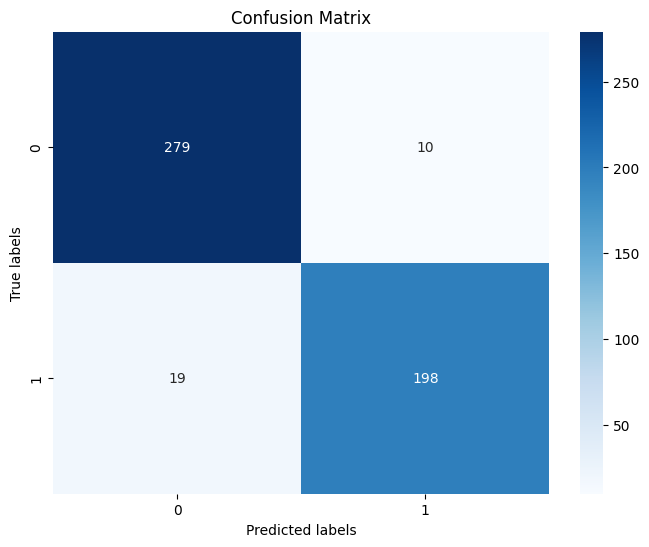

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class RandomForest:
    def __init__(self):
        self.stacking_model = None  

    def fit(self, X, y):        
        estimators = [
            ('xgb', XGBClassifier()),
            ('lgbm', LGBMClassifier()),
            ('extra_trees', ExtraTreesClassifier())]
            
        # Definir el clasificador de nivel 2 (modelo base)
        rf_base = RandomForestClassifier()
        
        # Crear el modelo de stacking
        self.stacking_model = StackingClassifier(estimators=estimators, final_estimator=rf_base)
        self.stacking_model.fit(X, y)

    def predict(self, X):
        return self.stacking_model.predict(X)


class RandomForestClassifierWrapper:
    def __init__(self, X, y):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.X_train = self.X_train.values
        self.y_train = self.y_train.values
        
        self.rf = RandomForest()

    def train(self):
        self.rf.fit(self.X_train, self.y_train)
        
    def predict(self):
        return self.rf.predict(self.X_test)

    def evaluate(self):
        y_pred = self.predict()        
        accuracy = accuracy_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred, average='macro')
        recall = recall_score(self.y_test, y_pred, average='macro')
        f1 = f1_score(self.y_test, y_pred, average='macro')
        return accuracy, precision, recall, f1

    def paint_confusion_matrix(self):
        # Calcular la matriz de confusión
        conf_matrix = confusion_matrix(self.y_test, self.predict())
        
        # Visualizar la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(self.y_test), yticklabels=np.unique(self.y_test))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()


class Resultado:
    def __init__(self, parametros):
        self.parametros = parametros
        self.metricas = {'Accuracy': None, 'Precision': None, 'Recall': None, 'F1-score': None}

    def update_metrics(self, accuracy, precision, recall, f1_score):
        self.metricas['Accuracy'] = accuracy
        self.metricas['Precision'] = precision
        self.metricas['Recall'] = recall
        self.metricas['F1-score'] = f1_score
        print("Métricas:\n")
        for metrica, valor in self.metricas.items():
            print(f"{metrica}: {valor * 100:.2f}%")
        print("\n\n\n")
        
    

def loadBalancedDataSet(file_path):
    """
    Carga un conjunto de datos balanceado desde un archivo Excel.   
    Returns:
    - X (DataFrame): Características del conjunto de datos.
    - y (Series): Etiquetas del conjunto de datos.
    """
    df = pd.read_excel(file_path)
    X = df.drop('CONDUCTA', axis=1)
    y = df['CONDUCTA']
    return X, y


balanced_data_file = "C:\\Users\\klgt1\\Downloads\\dataset_BALANCEADO.xlsx"

X, y = loadBalancedDataSet(balanced_data_file)

# Ejecutar el clasificador con los parámetros actuales
wrapper = RandomForestClassifierWrapper(X, y)
wrapper.train()

# Obtener los resultados de print_metrics
accuracy, precision, recall, f1_score = wrapper.evaluate()

# Crear un objeto Resultado y actualizar sus métricas
parametros = {}  # Puedes definir tus parámetros aquí si es necesario
resultado = Resultado(parametros)
resultado.update_metrics(accuracy, precision, recall, f1_score)

wrapper.paint_confusion_matrix()

